# Aparatment Prices
Using the file "Booli_sold.csv" we can analyze the data on sales of apartments in Ekhagen. 

1. Calculate the price per square meter (ppsqm) for each aparment sold. Ie. add a new variable to your table containing the data representing the price per square meter. 
2. Rank the top 5 most expensive appartments w.r.t ppsqm. Present this in a table. Hint: Use a sort function.
3. What is the avereage ppsqm in Ekhagen?
4. Highlight an aspect of the data that you find interesting. Explain your choice.

In [10]:
import pandas as pd

In [27]:
df = pd.read_csv("Booli_sold.csv") # read file
df["ppsqm"] = round(df["soldPrice"] / df["livingArea"])

print("The price per square meter is:\n" + str(df["ppsqm"]))

The price per square meter is:
0      52329.0
1      65417.0
2      75432.0
3      75234.0
4      82759.0
        ...   
153    56731.0
154    44900.0
155    63043.0
156    39286.0
157    43600.0
Name: ppsqm, Length: 158, dtype: float64


In [26]:
most_expensive_sorted = df.nlargest(5, 'ppsqm')[['soldPrice', 'livingArea', 'ppsqm']]
most_expensive_sorted['ppsqm'] = most_expensive_sorted['ppsqm'].round().astype(int) # convert to int and round for cleaner appereance


most_expensive_sorted = most_expensive_sorted.rename(columns={ # rename columns for a cleaner appearance
    'soldPrice': 'Sold Price (SEK)',
    'livingArea': 'Living Area (sqm)',
    'ppsqm': 'Price per sqm (SEK)'
})

# Print the table
print("The 5 most expensive apartments:\n" + str(most_expensive_sorted))


The 5 most expensive apartments:
    Sold Price (SEK)  Living Area (sqm)  Price per sqm (SEK)
67           2500000               24.0               104167
50           2450000               24.0               102083
54           2300000               23.0               100000
34           2210000               25.0                88400
55           2300000               26.9                85502


In [22]:
average_ppsqm = int(df["ppsqm"].mean())
print("The average price per square meter in Ekhagen is: " + str(average_ppsqm) + " kr")

The average price per square meter in Ekhagen is: 58759 kr


## Takeaway & Hypothesis
A potentially interesting takeaway from this analysis is that the prices in Ekhagen are generally on the lower end compared to other parts of Stockholm (we haven't analyzed other parts of Stockholm but from experience this can be said), this could be due to many factors but one particular factor that in mind is the time of construction of all the apartments being sold in Ekhagen. They are generally older apartments from the 1930s. A further analysis that could perhaps prove this "hypothesis" could be to analyze the general price ranges in other parts of Stockholm with similar socioeconomic and architectural conditions. 

# The Swedish Election of 2018
Using data provided to us in the file "2018_R_per_kommun.csv" we will now analyze the following:

1. Calculate the total number of legitimate votes (Giltiga Röster) in Stockholm during the election. That is, sum upp the number of legitimate votes for all municipalities (kommun) in Stockholm.
2. In which municipality did the social democratic party (Social demokraterna, S) garner the hightest voting percentage?
3. Rank the (3) municipialities with highest participation (valdeltagande). Present this in the form of a table.

In [29]:
df2 = pd.read_csv("2018_R_per_kommun.csv", sep=";") # read using separator ;
stockholm_df2 = df2[df2['LÄNSNAMN'] == 'Stockholms län'] # make variable composed of solely the stockholms län column
total_legitimate_votes = stockholm_df2["RÖSTER GILTIGA"].sum()

print("The total number of legitimate votes in Sweden during the election is: " + str(total_legitimate_votes))

The total number of legitimate votes in Sweden during the election is: 1426237


In [35]:
df2["S"] = pd.to_numeric(df2["S"], errors="coerce").dropna() # dropna overdundant here because nlargest will automatically drop all NA
muni_highest_S_voting_percentage = df2.nlargest(1, "S")[['LÄNSNAMN', 'KOMMUNNAMN', 'S']]

print("The municipality with the highest voting percentage in the political party S (Social Demokraterna): \n" + str(muni_highest_S_voting_percentage))

The municipality with the highest voting percentage in the political party S (Social Demokraterna): 
                 LÄNSNAMN KOMMUNNAMN     S
176  Västra Götalands län  Mariestad  33.0


In [37]:
df2["VALDELTAGANDE"] = pd.to_numeric(df2["VALDELTAGANDE"], errors="coerce")
top_3_highest_muni_participation = df2.nlargest(3, "VALDELTAGANDE")[['KOMMUNKOD','KOMMUNNAMN', 'VALDELTAGANDE']]

print("The 3 municipalities with highest participation (valdeltagande) are \n" + str(top_3_highest_muni_participation))

The 3 municipalities with highest participation (valdeltagande) are 
     KOMMUNKOD KOMMUNNAMN  VALDELTAGANDE
187         61    Hammarö           91.0
18          82      Nacka           90.0
57          17     Gnosjö           86.0


# Predicting Strokes
Our task is to draw a conclusion using a suitable plot based on the file "stroke-data.csv" that was given to us or more specifically the data provided to us by https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset - Kaggle: Stroke Prediction Dataset. We will do this by plotting a line chart showcasing whether some of the common factors of stroke have a correlation with infact having a stroke. These factors are age, gender, smoking, heart disease and BMI. 

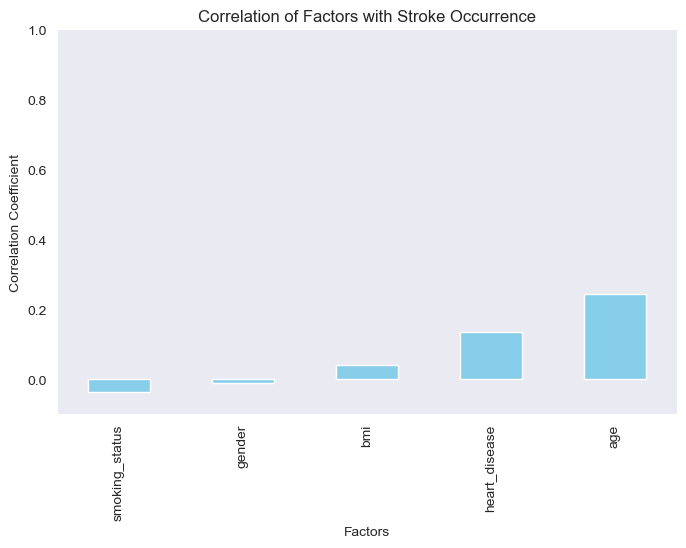

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('stroke-data.csv') # read

data = data[['gender', 'age', 'smoking_status', 'heart_disease', 'bmi', 'stroke']] # choose relevant columns and define only those as parts of data

data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2}) # substitute missing gender 
data['smoking_status'] = data['smoking_status'].map({ # map missing smoking status with numerical values
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
})

corr_matrix = data.corr() # correlation matrix, ie compute correlation between columns of our data, excluding null values

stroke_corr = corr_matrix['stroke'].drop('stroke').sort_values(ascending=True) # drop/remove unecessary rows or columns 
# from our dataframe matrix corr_matrix and show correlation with having a stroke and then finally sort

sns.set_style(style="dark") # set style of chart

plt.figure(figsize=(8,5)) # create bar plot with some dimensions 
stroke_corr.plot(kind='bar', color='skyblue') # characteristics of plot

plt.title('Correlation of Factors with Stroke Occurrence')
plt.xlabel('Factors')
plt.ylabel('Correlation Coefficient')
plt.ylim(-0.1, 1)

plt.show() # display

The conclusion that age is the main factor of stroke since it has the highest correlation coefficient with respect to having stroke can be drawn due to having the highest correlation coefficient, somewhere around 0.25. While we maybe cannot really draw a definite conclusion since we excluded some of the columns provided to us we can with regard to these factors draw the conclusion that previous heart disease and age certainly imply a higher chance of stroke. 